<a href="https://colab.research.google.com/github/SyedAzharAhammed/SupervisedLearning/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

hello


In [1]:
!git clone https://github.com/SyedAzharAhammed/SupervisedLearning.git

Cloning into 'SupervisedLearning'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 1), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [2]:
%matplotlib inline 

In [3]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
import os

In [10]:
os.getcwd()

'/content'

In [11]:
# reading the CSV file into pandas dataframe
mpg_df = pd.read_csv("/content/SupervisedLearning/Car-mpg.csv")  

In [ ]:
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [12]:
# drop the car name column as it is useless for the model
mpg_df = mpg_df.drop('car_name', axis=1)

In [13]:
mpg_df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1
394,44.0,4,97.0,52,2130,24.6,82,2,1
395,32.0,4,135.0,84,2295,11.6,82,1,1
396,28.0,4,120.0,79,2625,18.6,82,1,1


In [14]:
# Replace the numbers in categorical variables with the actual country names in the origin col
mpg_df['origin'] = mpg_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

In [15]:
mpg_df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,america,0
1,15.0,8,350.0,165,3693,11.5,70,america,0
2,18.0,8,318.0,150,3436,11.0,70,america,0
3,16.0,8,304.0,150,3433,12.0,70,america,0
4,17.0,8,302.0,140,3449,10.5,70,america,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,america,1
394,44.0,4,97.0,52,2130,24.6,82,europe,1
395,32.0,4,135.0,84,2295,11.6,82,america,1
396,28.0,4,120.0,79,2625,18.6,82,america,1


In [16]:
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
# This is also kown as one hot coding. The column names will be America, Europe and Asia... with one hot coding
mpg_df = pd.get_dummies(mpg_df, columns=['origin'])

In [17]:
mpg_df

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,1,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,1,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,1,0,0


In [18]:
#Lets analysze the distribution of the dependent (mpg) column
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_america,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0
origin_europe,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0


In [19]:
#Check if the hp column contains anything other than digits 
# run the "isdigit() check on 'hp' column of the mpg_df dataframe. Result will be True or False for every row
# capture the result in temp dataframe and dow a frequency count using value_counts()
# There are six records with non digit values in 'hp' column
temp = pd.DataFrame(mpg_df.hp.str.isdigit())  # if the string is made of digits store True else False  in the hp column 
# in temp dataframe

temp[temp['hp'] == False]   # from temp take only those rows where hp has false

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [21]:
# On inspecting records number 32, 126 etc, we find "?" in the columns. Replace them with "nan"
#Replace them with nan and remove the records from the data frame that have "nan"
mpg_df = mpg_df.replace('?', np.nan)

In [22]:
#Let us see if we can get those records with nan

mpg_df[mpg_df.isnull().any(axis=1)]

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,0,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,1,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,1,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,1,0,0


In [ ]:
# There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. 
#of the 398 rows 6 have NAN in the hp column. We will drop those 6 rows. Not a good idea under all situations
#note: HP is missing becauses of the non-numeric values in the column. 
#mpg_df = mpg_df.dropna()

In [23]:
#instead of dropping the rows, lets replace the missing values with median value. 
mpg_df.median()

mpg                 23.0
cyl                  4.0
disp               148.5
hp                  93.5
wt                2803.5
acc                 15.5
yr                  76.0
car_type             1.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [24]:
# replace the missing values in 'hp' with median value of 'hp' :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#mpg_df = mpg_df.fillna(mpg_df.median())

mpg_df = mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)


In [25]:
mpg_df.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                 object
wt                  int64
acc               float64
yr                  int64
car_type            int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [26]:
mpg_df['hp'] = mpg_df['hp'].astype('float64')  # converting the hp column from object / string type to float

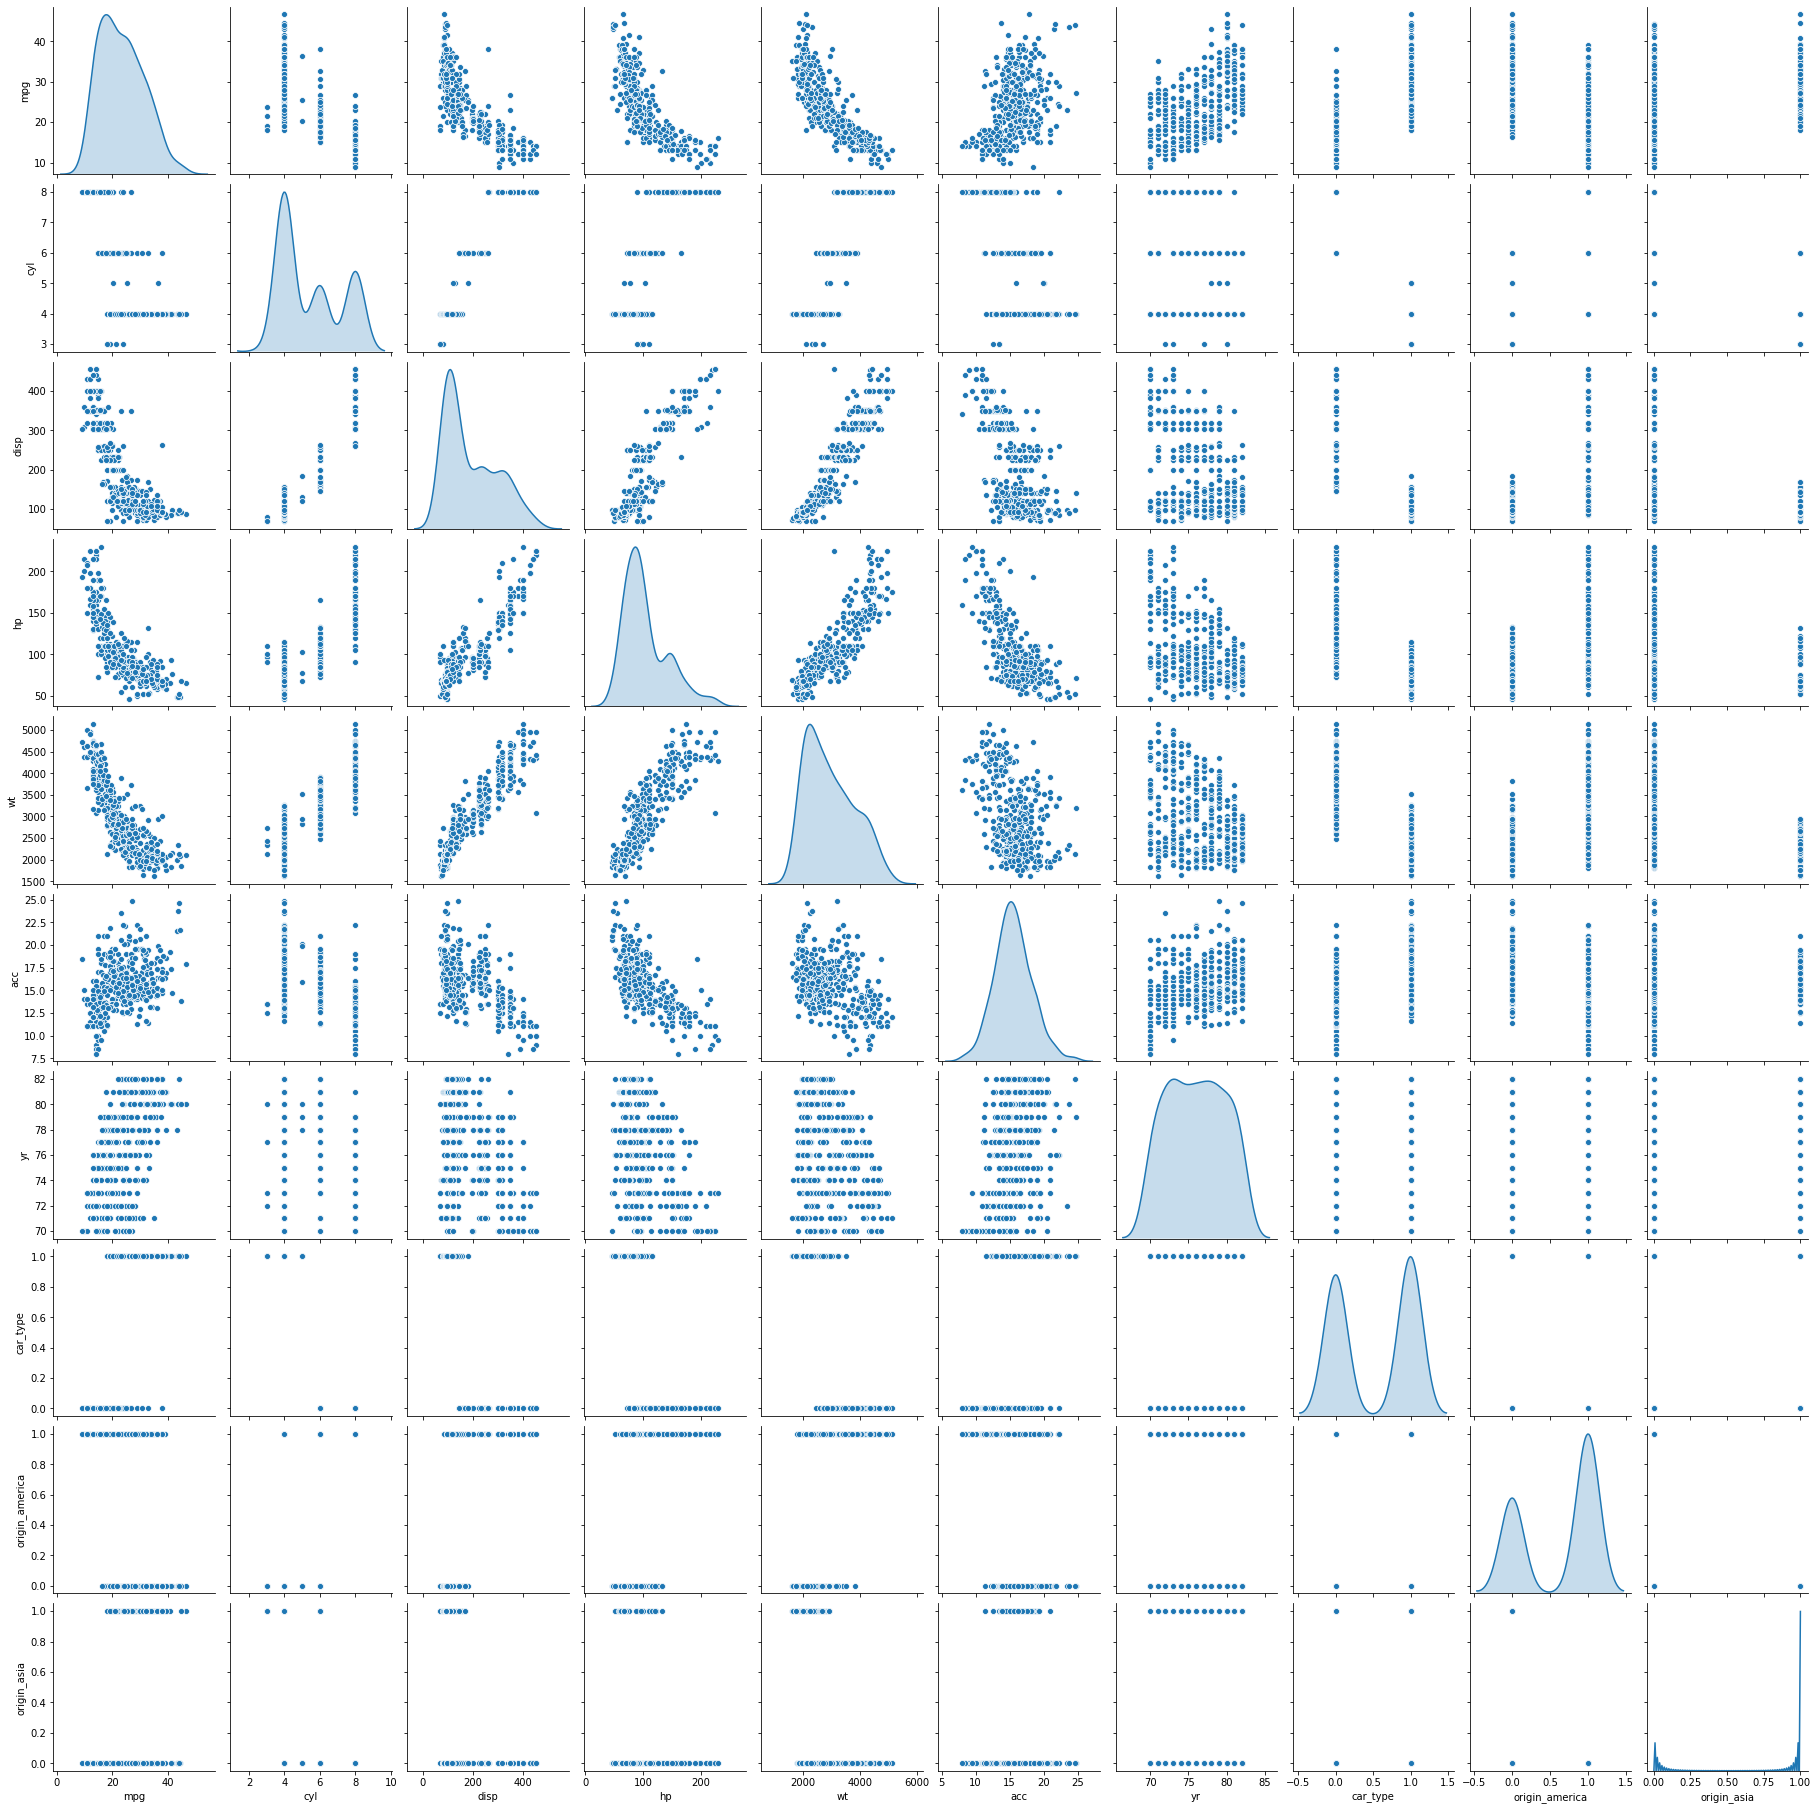

In [27]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 

mpg_df_attr = mpg_df.iloc[:, 0:10]

#axes = pd.plotting.scatter_matrix(mpg_df_attr)
#plt.tight_layout()
#plt.savefig('d:\greatlakes\mpg_pairpanel.png')

sns.pairplot(mpg_df_attr, diag_kind='kde')   # to plot density curve instead of histogram

#sns.pairplot(mpg_df_attr)  # to plot histogram, the default

In [ ]:
#The data distribution across various dimensions except 'Acc' do not look normal
#Close observation between 'mpg' and other attributes indicate the relationship is not really linear
#relation between 'mpg' and 'hp' show hetroscedacity... which will impact model accuracy
#How about 'mpg' vs 'yr' surprising to see a positive relation

In [28]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df.drop('mpg', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df[['mpg']]


In [30]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [31]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [32]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 1.4750732919168092
The coefficient for disp is 0.024349322002431478
The coefficient for hp is -0.0468619103932529
The coefficient for wt is -0.006564163296278441
The coefficient for acc is 0.04170227918809953
The coefficient for yr is 0.7938975478842015
The coefficient for car_type is 5.966597439861036
The coefficient for origin_america is -1.4243481095472283
The coefficient for origin_asia is 0.6521119249598709
The coefficient for origin_europe is 0.7722361845873518


In [34]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -28.2353955684975


In [35]:
# we can write our linear model as:
# Y=−21.11–0.35×X1+0.03×X2–0.02×X3–0.01×X4+0.12×X5+0.85×X6–1.90×X7+0.74×X8+1.16×X9
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.8513421387780062

In [ ]:
# So the model explains 85% of the variability in Y using X
#  Iteration -2 

#Since on many dimensions, the relationship is not really linear, let us try polynomial models (quadratic)

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_ = poly.fit_transform(X_train)

X_test_ = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train_, y_train)

y_pred = poly_clf.predict(X_test_)

#print(y_pred)

print(poly_clf.score(X_test_, y_test))


0.8626121616499312


In [37]:
print(X.shape)
print(X_train_.shape)
poly

(398, 10)
(278, 56)


PolynomialFeatures(degree=2, include_bias=True, interaction_only=True,
                   order='C')

In [38]:
# Even with polynomial function, we are not getting better results. What Next?  